In [2]:
#@ IMPORTING LIBRARIES AND DEPENDENCIES:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold

%matplotlib inline

In [3]:
data = !wget https://archive.ics.uci.edu/static/public/222/bank+marketing.zip

In [4]:
!sudo apt-get install unzip

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unzip is already the newest version (6.0-28ubuntu4.1).
0 upgraded, 0 newly installed, 0 to remove and 118 not upgraded.


In [5]:
!ls

'01 homework.ipynb'	 bank+marketing.zip.22	 laptops.csv
'01 intro'		 bank+marketing.zip.23	 laptops.csv.1
'02 homework.ipynb'	 bank+marketing.zip.24	 laptops.csv.10
'03 homework.ipynb'	 bank+marketing.zip.25	 laptops.csv.11
'Homework 04.ipynb'	 bank+marketing.zip.26	 laptops.csv.12
 bank+marketing.zip	 bank+marketing.zip.27	 laptops.csv.13
 bank+marketing.zip.1	 bank+marketing.zip.28	 laptops.csv.14
 bank+marketing.zip.10	 bank+marketing.zip.29	 laptops.csv.15
 bank+marketing.zip.11	 bank+marketing.zip.3	 laptops.csv.16
 bank+marketing.zip.12	 bank+marketing.zip.4	 laptops.csv.17
 bank+marketing.zip.13	 bank+marketing.zip.5	 laptops.csv.18
 bank+marketing.zip.14	 bank+marketing.zip.6	 laptops.csv.2
 bank+marketing.zip.15	 bank+marketing.zip.7	 laptops.csv.3
 bank+marketing.zip.16	 bank+marketing.zip.8	 laptops.csv.4
 bank+marketing.zip.17	 bank+marketing.zip.9	 laptops.csv.5
 bank+marketing.zip.18	 bank-additional.zip	 laptops.csv.6
 bank+marketing.zip.19	 bank-full.csv		 laptops.csv.7

In [6]:
!unzip -o bank+marketing.zip

Archive:  bank+marketing.zip
 extracting: bank.zip                
 extracting: bank-additional.zip     


In [7]:
!unzip -o bank.zip

Archive:  bank.zip
  inflating: bank-full.csv           
  inflating: bank-names.txt          
  inflating: bank.csv                


In [8]:
df = pd.read_csv("bank-full.csv", sep=';')

In [9]:
df['y'] = (df.y == 'yes').astype(int)

In [10]:
categories = [
                'age',
                'job',
                'marital',
                'education',
                'balance',
                'housing',
                'contact',
                'day',
                'month',
                'duration',
                'campaign',
                'pdays',
                'previous',
                'poutcome',
                'y'
]

In [11]:
df = df[categories]

In [12]:
numerical = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
categorical = ['job', 'marital', 'education', 'housing', 'contact', 'month', 'poutcome']

In [13]:
df

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,825,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,1729,no,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,5715,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,668,no,telephone,17,nov,508,4,-1,0,unknown,0


In [14]:
SEED = 1

In [15]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [16]:
len(df_train), len(df_val), len(df_test)

(27126, 9042, 9043)

In [17]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.y
y_val = df_val.y
y_test = df_test.y

del df_train['y']
del df_val['y']
del df_test['y']

**Question 1: ROC AUC feature importance**

In [18]:
#@ CALCULATING ROC AUC SCORE:
for c in numerical:
    auc = roc_auc_score(y_train, df_train[c])
    if auc < 0.5:
        auc = roc_auc_score(y_train, -df_train[c])
    print('%9s, %.3f' % (c, auc))

      age, 0.512
  balance, 0.589
      day, 0.526
 duration, 0.815
 campaign, 0.571
    pdays, 0.590
 previous, 0.599


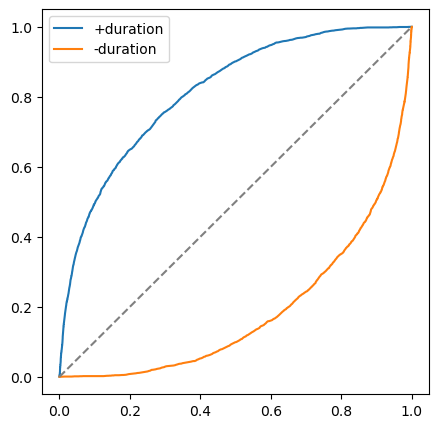

In [19]:
#@ PLOTTING THE ROC CURVE:
plt.figure(figsize=(5, 5))

fpr, tpr, _ = roc_curve(y_train, df_train.duration)
plt.plot(fpr, tpr, label='+duration')

fpr, tpr, _ = roc_curve(y_train, -df_train.duration)
plt.plot(fpr, tpr, label='-duration')

plt.plot([0, 1], [0, 1], color='grey', linestyle='--')

plt.legend()
plt.show()

**Question 2: Training the model**

In [20]:
#@ TRAINING LOGISTIC REGRESSION MODEL:
columns = categorical + numerical

train_dicts = df_train[columns].to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

val_dicts = df_val[columns].to_dict(orient='records')
X_val = dv.transform(val_dicts)

y_pred = model.predict_proba(X_val)[:, 1]

In [21]:
#@ INSPECTING ROC AUC SCORE:
roc_auc = roc_auc_score(y_val, y_pred)
roc_auc

0.9002157864615148

**Question 3: Precision and Recall**

In [22]:
#@ CREATING CONFUSION MATRIX:
def confusion_matrix_dataframe(y_val, y_pred):
    scores = []

    thresholds = np.linspace(0, 1, 101)

    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)

        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)

        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()

        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        scores.append((t, tp, fp, fn, tn))

    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns=columns)
    
    return df_scores


#@ IMPLEMENTATION OF FUNCTION:
df_scores = confusion_matrix_dataframe(y_val, y_pred)
df_scores[::10]

,threshold,tp,fp,fn,tn
0,0.0,1098,7944,0,0
10,0.1,926,1490,172,6454
20,0.2,711,689,387,7255
30,0.3,567,409,531,7535
40,0.4,460,270,638,7674
50,0.5,371,194,727,7750
60,0.6,290,135,808,7809
70,0.7,224,102,874,7842
80,0.8,147,65,951,7879
90,0.9,77,28,1021,7916


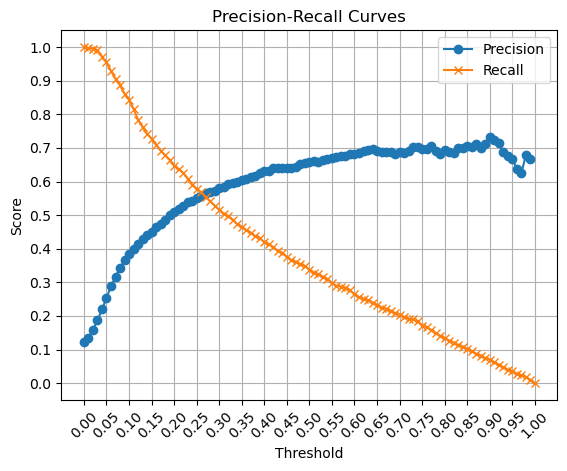

In [28]:
# Adding precision and recall columns
df_scores['p'] = df_scores.tp / (df_scores.tp + df_scores.fp)
df_scores['r'] = df_scores.tp / (df_scores.tp + df_scores.fn)

# Plotting the curves
plt.plot(df_scores.threshold, df_scores.p, label='Precision', marker='o')
plt.plot(df_scores.threshold, df_scores.r, label='Recall', marker='x')

# Adding grid, labels, and title for better readability
plt.grid(True)
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall Curves')

# Custom ticks for x-axis (threshold) and y-axis (scores)
plt.xticks(np.arange(min(df_scores.threshold), max(df_scores.threshold)+0.05, 0.05))  # Custom x-axis ticks
plt.yticks(np.arange(0, 1.1, 0.1))  # Custom y-axis ticks

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show legend and plot
plt.legend()
plt.show()


**Question 4: F1 score**

In [29]:
df_scores['f1'] = 2 * df_scores.p * df_scores.r / (df_scores.p + df_scores.r)

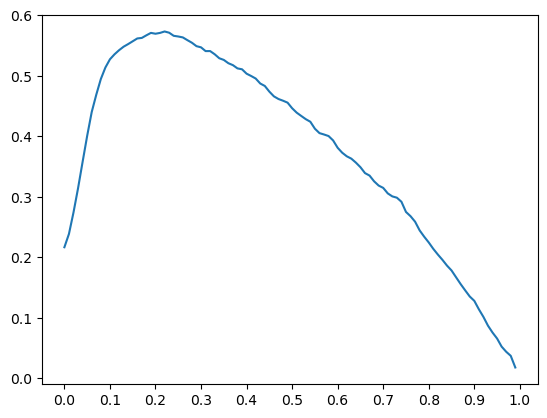

In [30]:
#@ INSPECTING F1 SCORE:
plt.plot(df_scores.threshold, df_scores.f1)
plt.xticks(np.linspace(0, 1, 11))
plt.show()

**Question 5: 5-Fold CV**

In [31]:
#@ DEFINING TRAIN AND PREDICT FUNCTION:
def train(df_train, y_train, C=1.0):
    dicts = df_train[columns].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=C)
    model.fit(X_train, y_train)

    return dv, model

def predict(df, dv, model):
    dicts = df[columns].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [33]:
#@ INITIALIZING KFOLD CROSS VALIDATION:
scores = []

kfold = KFold(n_splits=5, shuffle=True, random_state=1)

for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train = df_train.y
    y_val = df_val.y

    dv, model = train(df_train, y_train, C=1.0)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

print('%.3f +- %.3f' % (np.mean(scores), np.std(scores)))

0.906 +- 0.006


**Question 6: Hyperparameter Tuning**

In [36]:
#@ INSPECTING KFOLD CROSS VALIDATION:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

for C in [0.000001, 0.001, 1]:
    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.y
        y_val = df_val.y

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%4s, %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

C=1e-06, 0.701 +- 0.009
C=0.001, 0.861 +- 0.007
C=   1, 0.906 +- 0.006
